https://www.kaggle.com/stevezhenghp/airbnb-price-prediction (Regression)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
price = pd.read_csv("log_price.csv")

In [3]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
description               74111 non-null object
first_review              58247 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null object
host_since                73923 non-null object
instant_bookable          74111 non-null object
last_review               582

In [4]:
price['neighbourhood'].value_counts()

Williamsburg          2862
Bedford-Stuyvesant    2166
Bushwick              1601
Upper West Side       1396
Mid-Wilshire          1392
                      ... 
Woodland                 1
Edison Park              1
Bethesda, MD             1
West Town                1
Chillum, MD              1
Name: neighbourhood, Length: 619, dtype: int64

We are dropping the following attributes:
1. Id = the column contains unique Id
2. amenities : 90% of the apartments are having same amenities.
3. description: This column contains content which needs some other programing techniques.
4. First review, host since, last review = these are all dates which are almost unique
5. host_has_profile_pic = 99% of the data holds the value as true.
6. latitude, longitude, zipcode = It defines the city or the place where the apartment is and we have already considered city attribute for the same.
7. Name = it holds unique apartments name.
8. thumbnail_url = site url
9. neighbourhood = It is an imporatant feature to be considered but there are unique values which was increasing the number of features and was making the models more complex. The other way was to group the neighbourhood area as per the location but we are not aware how to do it without using externel tools, hence we decided to drop the feature.

In [5]:
price.drop(['id', 'amenities', 'description', 'first_review', 'host_has_profile_pic', 'host_since', 'last_review', 'latitude', 'longitude', 'name', 'neighbourhood', 'thumbnail_url', 'zipcode'], axis=1,inplace= True)

In [6]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 16 columns):
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null object
instant_bookable          74111 non-null object
number_of_reviews         74111 non-null int64
review_scores_rating      57389 non-null float64
bedrooms                  74020 non-null float64
beds                      73980 non-null float64
dtypes: bool(1), float64(5), int64(2), object(8)
memory usage: 8.6+ MB


In [7]:
price.isnull().sum()

log_price                     0
property_type                 0
room_type                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
host_identity_verified      188
host_response_rate        18299
instant_bookable              0
number_of_reviews             0
review_scores_rating      16722
bedrooms                     91
beds                        131
dtype: int64

In [8]:
price.describe()

,log_price,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds
count,74111.000000,74111.000000,73911.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,4.782069,3.155146,1.235263,20.900568,94.067365,1.265793,1.710868
std,0.717394,2.153589,0.582044,37.828641,7.836556,0.852143,1.254142
min,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000
25%,4.317488,2.000000,1.000000,1.000000,92.000000,1.000000,1.000000
50%,4.709530,2.000000,1.000000,6.000000,96.000000,1.000000,1.000000
75%,5.220356,4.000000,1.000000,23.000000,100.000000,1.000000,2.000000
max,7.600402,16.000000,8.000000,605.000000,100.000000,10.000000,18.000000


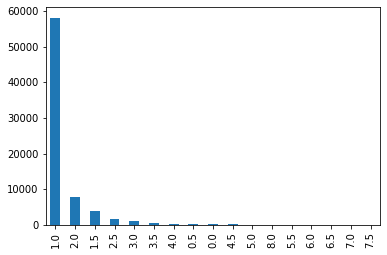

In [9]:
price['bathrooms'].value_counts().plot(kind='bar')

In [10]:
price['bathrooms'].fillna(1, inplace = True) 

As the mode of the column is 1  and only 0.27% of the data is missing.

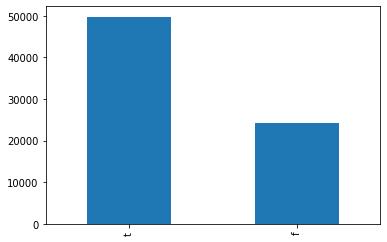

In [11]:
price['host_identity_verified'].value_counts().plot(kind='bar')

In [12]:
price['host_identity_verified'].fillna('t', inplace = True) 

As the mode of the column is true  and only 0.25% of the data is missing.

In [13]:
review = price[['review_scores_rating', 'number_of_reviews']].fillna('null')
rating = review[['review_scores_rating', 'number_of_reviews']].where(review['review_scores_rating'] == 'null')
review_rating = rating.loc[rating['review_scores_rating'] == 'null']
review_rating

,review_scores_rating,number_of_reviews
3,null,0.0
12,null,0.0
15,null,0.0
24,null,0.0
31,null,0.0
34,null,1.0
40,null,0.0
41,null,0.0
45,null,0.0
46,null,1.0


In [14]:
review_rating['number_of_reviews'].value_counts()

0.0      15819
1.0        746
2.0         86
3.0         26
4.0         10
5.0          5
8.0          4
15.0         3
28.0         2
23.0         2
33.0         1
25.0         1
18.0         1
21.0         1
6.0          1
7.0          1
10.0         1
32.0         1
13.0         1
43.0         1
47.0         1
101.0        1
36.0         1
17.0         1
9.0          1
37.0         1
19.0         1
63.0         1
131.0        1
Name: number_of_reviews, dtype: int64

In [15]:
price['review_scores_rating'].fillna(0, inplace = True)
#for the null values the no. of reviews are 0 or 1 which implies that the scores will be 0

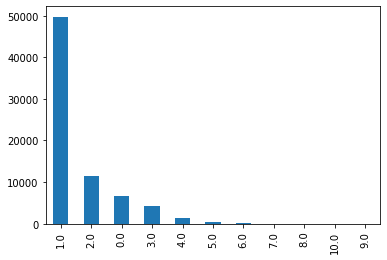

In [16]:
price['bedrooms'].value_counts().plot(kind='bar')

In [17]:
price['bedrooms'].fillna(1, inplace = True) # as the mode of the column is 1  and only 0.12% of the data is missing

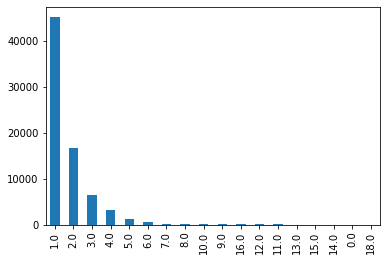

In [18]:
price['beds'].value_counts().plot(kind='bar')

In [19]:
price['beds'].fillna(1, inplace = True) # as the mode of the column is 1  and only 0.18% of the data is missing

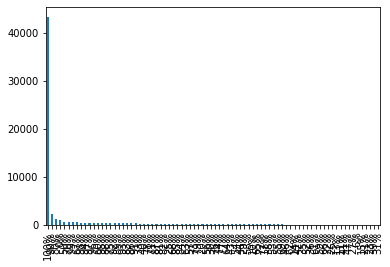

In [20]:
price['host_response_rate'].value_counts().plot(kind='bar')

In [21]:
price['host_response_rate'] = price['host_response_rate'].str.strip('%')

In [22]:
price['host_response_rate'].fillna(100, inplace = True)
 # as the mode of the column is 100 and more than 60% of the data holds the value 100

In [23]:
price['host_response_rate'] = price['host_response_rate'].astype(int)

In [24]:
price['host_response_rate'] = price['host_response_rate'].divide(100)

In [25]:
price['host_response_rate']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
74106    1.0
74107    1.0
74108    1.0
74109    1.0
74110    1.0
Name: host_response_rate, Length: 74111, dtype: float64

In [26]:
price.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,1.0,f,2,100.0,1.0,1.0
1,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,f,1.0,t,6,93.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,1.0,t,10,92.0,1.0,3.0
3,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,t,1.0,f,0,0.0,2.0,2.0
4,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,1.0,t,4,40.0,0.0,1.0


In [27]:
room=pd.get_dummies(price['room_type'],columns='room_type',prefix='room_type')
bed=pd.get_dummies(price['bed_type'],columns='bed_type',prefix='bed_type')
city=pd.get_dummies(price['city'],columns='city',prefix='city')
price['cleaning_fee'] = price['cleaning_fee'].astype(int)
policy=pd.get_dummies(price['cancellation_policy'],columns='cancellation_policy',prefix='cancellation_policy')
price[['host_identity_verified']]= price['host_identity_verified'].map({'f':0, 't':1})
price[['instant_bookable']]= price['instant_bookable'].map({'f':0, 't':1})

In [28]:
price.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,1,NYC,1,1.0,0,2,100.0,1.0,1.0
1,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,1,NYC,0,1.0,1,6,93.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,1,NYC,1,1.0,1,10,92.0,1.0,3.0
3,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,1,SF,1,1.0,0,0,0.0,2.0,2.0
4,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,1,DC,1,1.0,1,4,40.0,0.0,1.0


In [29]:
price=pd.concat([price, room, bed, city, policy], axis=1)
price.drop(['room_type', 'bed_type', 'cancellation_policy', 'city'],axis=1,inplace= True)

In [30]:
price['property_type'].value_counts()

Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Train                     2
Cave                      2
Parking Space             1
Casa particular           1
Lighthouse                1
Island                    1
Name: property_type,

Grouped the property type of less values into others as the number of unique values are high.

In [31]:


price['property_type'] = price['property_type'].replace(['Villa', 'Dorm', 'Guest suite', 'Camper/RV','Timeshare', 'Boutique hotel','Hostel',
       'In-law', 'Boat', 'Serviced apartment', 'Castle', 'Cabin',
       'Treehouse', 'Tipi', 'Vacation home', 'Tent', 'Hut',
       'Casa particular', 'Chalet', 'Yurt', 'Earth House',
       'Parking Space', 'Train', 'Cave', 'Lighthouse', 'Island'], 'Other')

In [32]:
price['property_type'].value_counts()

Apartment          49003
House              16511
Condominium         2658
Townhouse           1692
Other               1677
Loft                1244
Guesthouse           498
Bed & Breakfast      462
Bungalow             366
Name: property_type, dtype: int64

In [33]:
prop=pd.get_dummies(price['property_type'],columns='property_type',prefix='property_type')

In [34]:
price=pd.concat([price, prop], axis=1)

In [35]:
price.drop(['property_type'],axis=1,inplace= True)

In [36]:
price.head()

,log_price,accommodates,bathrooms,cleaning_fee,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,...,cancellation_policy_super_strict_60,property_type_Apartment,property_type_Bed & Breakfast,property_type_Bungalow,property_type_Condominium,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse
0,5.010635,3,1.0,1,1,1.0,0,2,100.0,1.0,...,0,1,0,0,0,0,0,0,0,0
1,5.129899,7,1.0,1,0,1.0,1,6,93.0,3.0,...,0,1,0,0,0,0,0,0,0,0
2,4.976734,5,1.0,1,1,1.0,1,10,92.0,1.0,...,0,1,0,0,0,0,0,0,0,0
3,6.620073,4,1.0,1,1,1.0,0,0,0.0,2.0,...,0,0,0,0,0,0,1,0,0,0
4,4.744932,2,1.0,1,1,1.0,1,4,40.0,0.0,...,0,1,0,0,0,0,0,0,0,0


In [37]:
price.shape

(74111, 39)

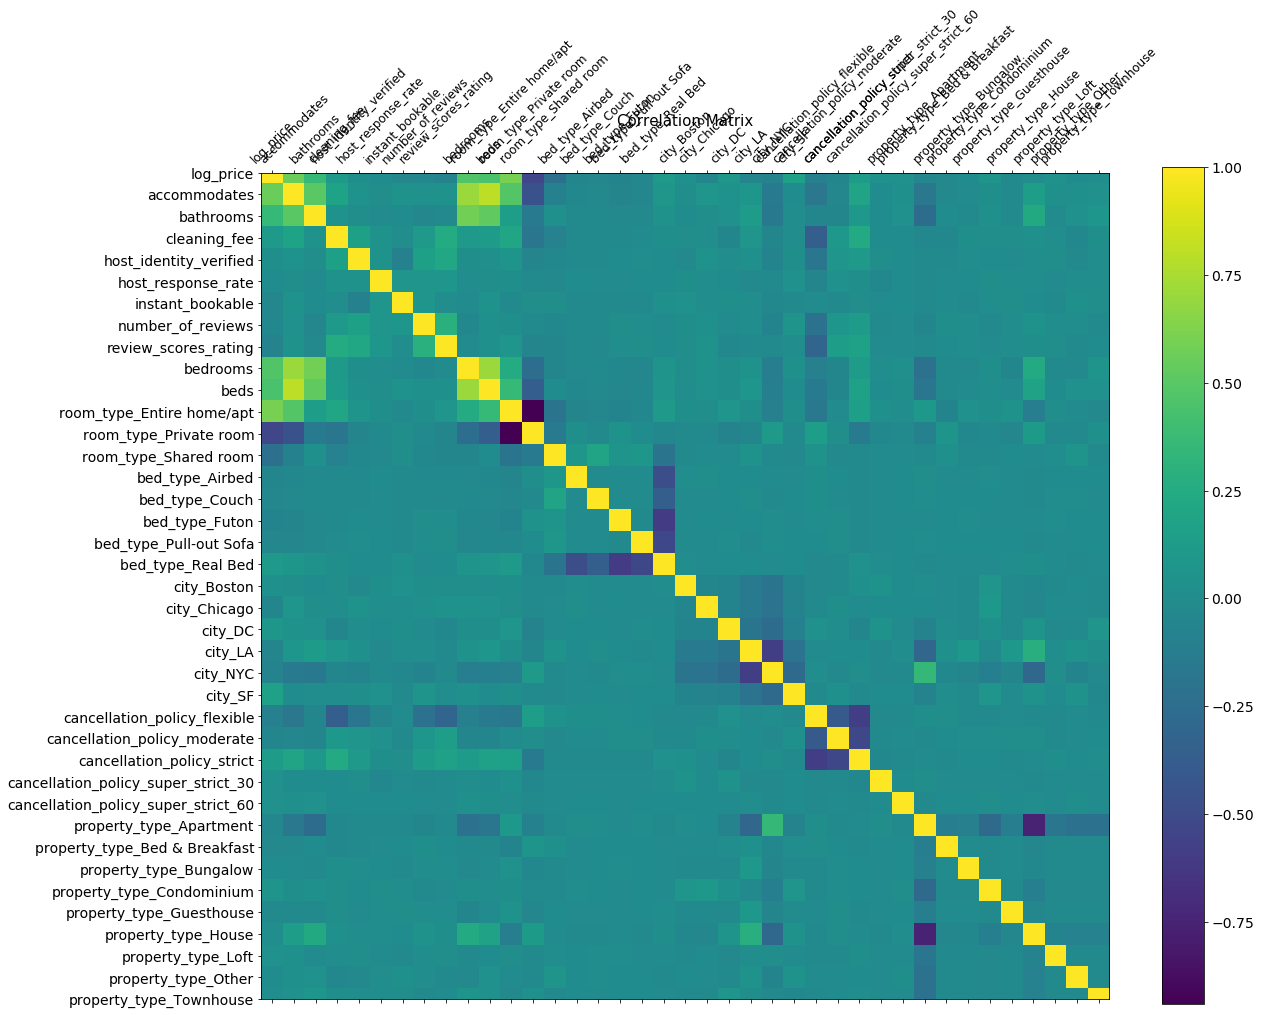

In [38]:
f = plt.figure(figsize=(19, 15))
plt.matshow(price.corr(), fignum=f.number)
plt.xticks(range(price.shape[1]), price.columns, fontsize=12, rotation=45)
plt.yticks(range(price.shape[1]), price.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=15);

In [39]:
np.random.seed(32)

In [40]:
import random

In [41]:
df = price.sample(5000) 
# we are taking the sample of the entire data as there is 74111 instances as it is taking alot of time in running the models.

In [42]:
X = df.drop('log_price', 1).values

In [43]:
y = df['log_price'].values

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [45]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

# Bagging with Lasso

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import BaggingRegressor
from  sklearn.linear_model import Lasso
param_grid_lasso_bag = {'n_estimators':[100, 200, 300, 400, 500],
                       'max_samples': [50,100,200,250,400,450]}
print(param_grid_lasso_bag)

grid_search_lasso_bag = GridSearchCV((BaggingRegressor(Lasso(0.001), bootstrap=True, random_state=0, oob_score=True)), param_grid_lasso_bag, cv=5, scoring = 'neg_mean_squared_error')
grid_search_lasso_bag.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_lasso_bag.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lasso_bag.best_score_))

{'n_estimators': [100, 200, 300, 400, 500], 'max_samples': [50, 100, 200, 250, 400, 450]}


c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002213345038075687, tolerance: 0.00204106846940739
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002850794108471, tolerance: 0.002157669869302544
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006164808404456323, tolerance: 0.0031081083797282706
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-pack

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005723139239417918, tolerance: 0.002545777671203541
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003202815367577827, tolerance: 0.002244605918655413
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0059390067971945015, tolerance: 0.0030320147745539292
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002697025680294729, tolerance: 0.0026403768492903835
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035964861584769636, tolerance: 0.0023593416647614443
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002196787978031356, tolerance: 0.001702564761297766
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\sit

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002191181887821969, tolerance: 0.0015845250555436877
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008133886720878891, tolerance: 0.002423348176685658
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0035694753798591883, tolerance: 0.0024003936985805313
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\sit

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001882679576611146, tolerance: 0.0017040086568836338
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002213345038075687, tolerance: 0.00204106846940739
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002850794108471, tolerance: 0.002157669869302544
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-pack

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008923026608880669, tolerance: 0.0019946046894810496
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00371242196167465, tolerance: 0.0035861158213480156
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034937523836209294, tolerance: 0.002494116725638432
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006663715663496994, tolerance: 0.0020186572814564364
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007248083913909298, tolerance: 0.002723229668071616
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004925002804092138, tolerance: 0.0028944455172403433
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002213345038075687, tolerance: 0.00204106846940739
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002850794108471, tolerance: 0.002157669869302544
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006164808404456323, tolerance: 0.0031081083797282706
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-pack

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008923026608880669, tolerance: 0.0019946046894810496
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00371242196167465, tolerance: 0.0035861158213480156
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034937523836209294, tolerance: 0.002494116725638432
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006663715663496994, tolerance: 0.0020186572814564364
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007248083913909298, tolerance: 0.002723229668071616
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004925002804092138, tolerance: 0.0028944455172403433
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004014052329169182, tolerance: 0.003524296932913512
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005763550203718992, tolerance: 0.0031314392641735907
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002245953747345375, tolerance: 0.001293872578578489
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011941769243303924, tolerance: 0.004812183302489724
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00579227329217602, tolerance: 0.005290953516267463
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018821383033269967, tolerance: 0.005051091750476947
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-pa

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013703217723092465, tolerance: 0.0049005090824245385
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02064668789827806, tolerance: 0.0071667651703598255
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007660496121667748, tolerance: 0.004366831706242736
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009601260018232693, tolerance: 0.007152209731184398
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008095304535231662, tolerance: 0.005087927854203411
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013703217723092465, tolerance: 0.0049005090824245385
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05742071875788213, tolerance: 0.009966804323761767
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022731631773254435, tolerance: 0.012097210174042538
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014192652588057797, tolerance: 0.012373398338013545
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-pa

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0214082803959883, tolerance: 0.013414326562017645
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01893004089146899, tolerance: 0.011388961348955551
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019998955174358457, tolerance: 0.013422504809796695
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-pack

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06894601013588897, tolerance: 0.022808738196393733
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10723754552789444, tolerance: 0.02330361704328348
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10723754552789444, tolerance: 0.02330361704328348
  positive)


Best parameters: {'max_samples': 450, 'n_estimators': 100}
Best cross-validation score: -0.23


In [47]:
lasso_reg = Lasso(0.001)
bag_reg_lasso = BaggingRegressor(lasso_reg, n_estimators=100, max_samples=450, bootstrap=True, random_state=0, oob_score=True)

bag_reg_lasso.fit(X_train, y_train)
y_pred_bag_reg_lasso = bag_reg_lasso.predict(X_test)

In [48]:
y_pred_train_bag_lasso = cross_val_score(BaggingRegressor(lasso_reg, n_estimators=100, max_samples=450, bootstrap=True, random_state=0, oob_score=True), X_train, y_train, cv = 5)
y_pred_train_bag_lasso_mean = y_pred_train_bag_lasso.mean()
print("average train score: ", y_pred_train_bag_lasso_mean)

y_pred_test_bag_lasso = cross_val_score(BaggingRegressor(lasso_reg, n_estimators=100, max_samples=450, bootstrap=True, random_state=0, oob_score=True),X_test, y_test, cv = 5)
y_pred_test_bag_lasso_mean = y_pred_test_bag_lasso.mean()
print("average test score: ", y_pred_test_bag_lasso_mean)

average train score:  0.5726610065386677


c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07287660293008003, tolerance: 0.023550349933481908
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.032078374857434255, tolerance: 0.023114979811187007
  positive)


average test score:  0.5258752785155849


In [49]:
print(bag_reg_lasso.score(X_train, y_train))
print(bag_reg_lasso.score(X_test, y_test))

0.5826059423465392
0.543415685007275


In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, bag_reg_lasso.predict(X_test))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.243910
RMSE: 0.493872


# Bagging with Ridge

In [51]:
from sklearn.ensemble import BaggingRegressor
from  sklearn.linear_model import Ridge
param_grid_ridge_bag = {'n_estimators':[100, 200, 300, 400, 500],
                       'max_samples': [50,100,200,250,400,450]}
print(param_grid_ridge_bag)

grid_search_ridge_bag = GridSearchCV((BaggingRegressor(Ridge(100), bootstrap=True, random_state=0, oob_score=True)), param_grid_ridge_bag, cv=5, scoring = 'neg_mean_squared_error')
grid_search_ridge_bag.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_ridge_bag.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_ridge_bag.best_score_))

{'n_estimators': [100, 200, 300, 400, 500], 'max_samples': [50, 100, 200, 250, 400, 450]}
Best parameters: {'max_samples': 450, 'n_estimators': 100}
Best cross-validation score: -0.23


In [52]:
from sklearn.ensemble import BaggingRegressor
from  sklearn.linear_model import Ridge

ridge_reg = Ridge(100)
bag_reg_ridge = BaggingRegressor(ridge_reg, n_estimators=100, max_samples=450, bootstrap=True, random_state=0, oob_score=True)

bag_reg_ridge.fit(X_train, y_train)
y_pred_bag_reg_ridge = bag_reg_ridge.predict(X_test)

In [53]:
y_pred_train_bag_ridge = cross_val_score(BaggingRegressor(ridge_reg, n_estimators=100, max_samples=450, bootstrap=True, random_state=0, oob_score=True), X_train, y_train, cv = 5)
y_pred_train_bag_ridge_mean = y_pred_train_bag_ridge.mean()
print("average train score: ", y_pred_train_bag_ridge_mean)

y_pred_test_bag_ridge = cross_val_score(BaggingRegressor(ridge_reg, n_estimators=100, max_samples=450, bootstrap=True, random_state=0, oob_score=True),X_test, y_test, cv = 5)
y_pred_test_bag_ridge_mean = y_pred_test_bag_ridge.mean()
print("average test score: ", y_pred_test_bag_ridge_mean)

average train score:  0.564621561894317
average test score:  0.5217417921365431


In [54]:

print(bag_reg_ridge.score(X_train, y_train))
print(bag_reg_ridge.score(X_test, y_test))

0.572465263972507
0.5296123701590796


In [55]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, bag_reg_ridge.predict(X_test))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.251283
RMSE: 0.501282


# Pasting with Lasso

In [56]:
from sklearn.ensemble import BaggingRegressor
from  sklearn.linear_model import Lasso
param_grid_lasso_paste = {'n_estimators':[100, 200, 300, 400, 500],
                       'max_samples': [50,100,200,250,400,450]}
print(param_grid_lasso_paste)

grid_search_lasso_paste = GridSearchCV((BaggingRegressor(Lasso(0.001), bootstrap=False, random_state=0, oob_score=False)), param_grid_lasso_paste, cv=5, scoring = 'neg_mean_squared_error')
grid_search_lasso_paste.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_lasso_paste.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lasso_paste.best_score_))

{'n_estimators': [100, 200, 300, 400, 500], 'max_samples': [50, 100, 200, 250, 400, 450]}


c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002957581974389889, tolerance: 0.002401249631972005
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005327585908449173, tolerance: 0.0022574487771015307
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023723453825166274, tolerance: 0.0018833200535578055
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\sit

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0027217652562647743, tolerance: 0.0024192633969066808
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036867424035449403, tolerance: 0.001977188307284153
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.001890989081554384, tolerance: 0.001639418478046499
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\sit

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0020966169277087943, tolerance: 0.0019486086004340223
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029134845635123696, tolerance: 0.0028332606758211315
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023733338811799953, tolerance: 0.0019564565653664703
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012013290769853135, tolerance: 0.0023600606184253233
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003394199459462399, tolerance: 0.0022843796620406697
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007082000658618526, tolerance: 0.002839243327356107
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036937232564726585, tolerance: 0.002254888359290411
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036319434895508707, tolerance: 0.0022113723798794917
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005910604572703093, tolerance: 0.004107642217829715
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\sit

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0037625112203709676, tolerance: 0.0036742663980343544
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0038843376977220068, tolerance: 0.0016461059858671552
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0027217652562647743, tolerance: 0.0024192633969066808
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00547768794218495, tolerance: 0.0030782188731112753
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002525189670769201, tolerance: 0.0021893811639255856
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008093770898809804, tolerance: 0.0029312172220353626
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006906226308451835, tolerance: 0.0034748592398554812
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003769993159848717, tolerance: 0.002827402738462698
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00634612595325601, tolerance: 0.001985904300203289
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-p

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005384872431889676, tolerance: 0.0032839434722698167
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006623657076974432, tolerance: 0.0027446042336124964
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006514796073050277, tolerance: 0.003336097162893214
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012013290769853135, tolerance: 0.0023600606184253233
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003394199459462399, tolerance: 0.0022843796620406697
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007082000658618526, tolerance: 0.002839243327356107
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002165610111399374, tolerance: 0.0017082401102603093
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004953477509286763, tolerance: 0.0020562956902041188
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0037905201175103542, tolerance: 0.0025869433212313015
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\si

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0020966169277087943, tolerance: 0.0019486086004340223
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029134845635123696, tolerance: 0.0028332606758211315
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023733338811799953, tolerance: 0.0019564565653664703
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006930265967710625, tolerance: 0.005524712024542106
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004755872128749061, tolerance: 0.004419029308312457
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009171026254763959, tolerance: 0.003745714835653273
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-p

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004755872128749061, tolerance: 0.004419029308312457
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009171026254763959, tolerance: 0.003745714835653273
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007983148110970006, tolerance: 0.005757010331426449
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-p

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023770697366451543, tolerance: 0.010425195039181734
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022149534208111277, tolerance: 0.009094071459513554
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.037034599528901424, tolerance: 0.011488671862390585
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-p

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02348445801217025, tolerance: 0.010437893349230454
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012922355881318737, tolerance: 0.008328415512009768
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019233610700872816, tolerance: 0.011660388512372657
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-pa

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05310780339824106, tolerance: 0.014306120690300773
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02023477281392161, tolerance: 0.015351728681483727
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.029636645161872366, tolerance: 0.015612187882603554
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-pac

Best parameters: {'max_samples': 450, 'n_estimators': 200}
Best cross-validation score: -0.23


In [57]:
from sklearn.ensemble import BaggingRegressor
from  sklearn.linear_model import Lasso

lasso_reg = Lasso(0.001)
paste_reg_lasso = BaggingRegressor(lasso_reg, n_estimators=200, max_samples=450, bootstrap=False, random_state=0, oob_score=False)

paste_reg_lasso.fit(X_train, y_train)
y_pred_paste_reg_lasso = paste_reg_lasso.predict(X_test)

In [58]:
y_pred_train_paste_lasso = cross_val_score(BaggingRegressor(lasso_reg, n_estimators=200, max_samples=450, bootstrap=False, random_state=0, oob_score=False), X_train, y_train, cv = 5)
y_pred_train_paste_lasso_mean = y_pred_train_paste_lasso.mean()
print("average train score: ", y_pred_train_paste_lasso_mean)

y_pred_test_paste_lasso = cross_val_score(BaggingRegressor(lasso_reg, n_estimators=200, max_samples=450, bootstrap=False, random_state=0, oob_score=False),X_test, y_test, cv = 5)
y_pred_test_paste_lasso_mean = y_pred_test_paste_lasso.mean()
print("average test score: ", y_pred_test_paste_lasso_mean)

average train score:  0.5727288723062889
average test score:  0.526484021195506


In [59]:
print(paste_reg_lasso.score(X_train, y_train))
print(paste_reg_lasso.score(X_test, y_test))

0.5825300038731989
0.545747925843016


In [60]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, paste_reg_lasso.predict(X_test))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.242664
RMSE: 0.492609


# Pasting with Ridge

In [61]:
from sklearn.ensemble import BaggingRegressor
from  sklearn.linear_model import Ridge
param_grid_ridge_paste = {'n_estimators':[100, 200, 300, 400, 500],
                       'max_samples': [50,100,200,250,400,450]}
print(param_grid_ridge_paste)

grid_search_ridge_paste = GridSearchCV((BaggingRegressor(Ridge(100), bootstrap=False, random_state=0, oob_score=False)), param_grid_ridge_paste, cv=5, scoring = 'neg_mean_squared_error')
grid_search_ridge_paste.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_ridge_paste.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_ridge_paste.best_score_))

{'n_estimators': [100, 200, 300, 400, 500], 'max_samples': [50, 100, 200, 250, 400, 450]}
Best parameters: {'max_samples': 450, 'n_estimators': 400}
Best cross-validation score: -0.23


In [62]:
from sklearn.ensemble import BaggingRegressor
from  sklearn.linear_model import Ridge

ridge_reg = Ridge(100)
paste_reg_ridge = BaggingRegressor(ridge_reg, n_estimators=400, max_samples=450, bootstrap=False, random_state=0, oob_score=False)

paste_reg_ridge.fit(X_train, y_train)
y_pred_paste_reg_ridge = paste_reg_ridge.predict(X_test)
                                   

In [63]:
y_pred_train_paste_ridge = cross_val_score(BaggingRegressor(ridge_reg, n_estimators=400, max_samples=450, bootstrap=False, random_state=0, oob_score=False), X_train, y_train, cv = 5)
y_pred_train_paste_ridge_mean = y_pred_train_paste_ridge.mean()
print("average train score: ", y_pred_train_paste_ridge_mean)

y_pred_test_paste_ridge = cross_val_score(BaggingRegressor(ridge_reg, n_estimators=400, max_samples=450, bootstrap=False, random_state=0, oob_score=False),X_test, y_test, cv = 5)
y_pred_test_paste_ridge_mean = y_pred_test_paste_ridge.mean()
print("average test score: ", y_pred_test_paste_ridge_mean)

average train score:  0.5646559405041662
average test score:  0.5225748978588236


In [64]:
print(paste_reg_ridge.score(X_train, y_train))
print(paste_reg_ridge.score(X_test, y_test))

0.5726169024242554
0.5307759953017619


In [65]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, paste_reg_ridge.predict(X_test))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.250662
RMSE: 0.500661


# AdaBoosting with Lasso

In [66]:
from sklearn.ensemble import AdaBoostRegressor
param_grid_lasso_ada = {'n_estimators':[100, 200, 300, 400, 500],
                       'learning_rate': [0.1, 0.2, 0.5, 1, 10]}
print(param_grid_lasso_ada)

grid_search_lasso_ada = GridSearchCV((AdaBoostRegressor(Lasso(0.001))), param_grid_lasso_ada, cv=5, scoring = 'neg_mean_squared_error')
grid_search_lasso_ada.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_lasso_ada.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lasso_ada.best_score_))

{'n_estimators': [100, 200, 300, 400, 500], 'learning_rate': [0.1, 0.2, 0.5, 1, 10]}


c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4218614486912884, tolerance: 0.513367793707311
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8891945267000665, tolerance: 0.4674594691026588
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1361969557501652, tolerance: 0.5156451446998523
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklea

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0585797838548388, tolerance: 0.4987078077023489
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.12543290486974, tolerance: 0.5155081857339655
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1170587740771225, tolerance: 0.513316787600656
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1893710677231866, tolerance: 0.5321083102434873
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.628945899781229, tolerance: 0.3220197579564033
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.692268969602537, tolerance: 0.5454408947548107
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklear

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.730232916011119, tolerance: 0.6122796209500814
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3418338041738025, tolerance: 0.6111176765841825
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7037385094308775, tolerance: 0.6503814580593357
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklea

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.525266169688333, tolerance: 1.2268549074235937
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarnin

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5915594233473778, tolerance: 0.005118129423025484
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.045625448216039755, tolerance: 0.0362440326446275
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinat

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.48736265932913, tolerance: 1.2906567570643614
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.053102499251317825, tolerance: 0.02438341742239578
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.34905168943376363, tolerance: 0.26409029168926357
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordina

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.35597436859027, tolerance: 1.6116729643829502
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.766445877647461, tolerance: 1.6447253277257274
  positive)


Best parameters: {'learning_rate': 0.1, 'n_estimators': 400}
Best cross-validation score: -0.24


In [67]:

ada_reg_lasso = AdaBoostRegressor(Lasso(0.001), n_estimators=400, learning_rate=0.1, random_state=0)
ada_reg_lasso.fit(X_train, y_train)
y_pred_ada_reg_lasso = ada_reg_lasso.predict(X_test)

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3244417300029454, tolerance: 0.6091676555185787
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.078176375973271, tolerance: 0.6785526505467132
  positive)


In [68]:
y_pred_train_ada_lasso = cross_val_score(AdaBoostRegressor(Lasso(0.001), n_estimators=400, learning_rate=0.1, random_state=0), X_train, y_train, cv = 5)
y_pred_train_ada_lasso_mean = y_pred_train_ada_lasso.mean()
print("average train score: ", y_pred_train_ada_lasso_mean)

y_pred_test_ada_lasso = cross_val_score(AdaBoostRegressor(Lasso(0.001), n_estimators=400, learning_rate=0.1, random_state=0),X_test, y_test, cv = 5)
y_pred_test_ada_lasso_mean = y_pred_test_ada_lasso.mean()
print("average test score: ", y_pred_test_ada_lasso_mean)

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.26905764396588, tolerance: 0.5195837308571422
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2194241235938534, tolerance: 0.5548717683858915
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.135398932467524, tolerance: 0.517932285360854
  positive)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\

average train score:  0.5509683390296375
average test score:  0.4727641666794452


In [69]:
print(ada_reg_lasso.score(X_train, y_train))
print(ada_reg_lasso.score(X_test, y_test))

0.5638332564117414
0.5419061878877083


In [70]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, ada_reg_lasso.predict(X_test))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.244716
RMSE: 0.494688


# AdaBoosting with Ridge

In [71]:
param_grid_ridge_ada = {'n_estimators':[100, 200, 300, 400, 500],
                       'learning_rate': [0.1, 0.2, 0.5, 1, 10]}
print(param_grid_ridge_ada)

grid_search_ridge_ada = GridSearchCV((AdaBoostRegressor(Ridge(100))), param_grid_ridge_ada, cv=5, scoring = 'neg_mean_squared_error')
grid_search_ridge_ada.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_ridge_ada.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_ridge_ada.best_score_))

{'n_estimators': [100, 200, 300, 400, 500], 'learning_rate': [0.1, 0.2, 0.5, 1, 10]}
Best parameters: {'learning_rate': 0.5, 'n_estimators': 100}
Best cross-validation score: -0.24


In [72]:
ada_reg_ridge = AdaBoostRegressor(Ridge(100), n_estimators=100, learning_rate=0.5, random_state=0)
ada_reg_ridge.fit(X_train, y_train)
y_pred_ada_reg_ridge = ada_reg_ridge.predict(X_test)

In [73]:
y_pred_train_ada_ridge = cross_val_score(AdaBoostRegressor(Ridge(100), n_estimators=100, learning_rate=0.5, random_state=0), X_train, y_train, cv = 5)
y_pred_train_ada_ridge_mean = y_pred_train_ada_ridge.mean()
print("average train score: ", y_pred_train_ada_ridge_mean)

y_pred_test_ada_ridge = cross_val_score(AdaBoostRegressor(Ridge(100), n_estimators=100, learning_rate=0.5, random_state=0),X_test, y_test, cv = 5)
y_pred_test_ada_ridge_mean = y_pred_test_ada_ridge.mean()
print("average test score: ", y_pred_test_ada_ridge_mean)

average train score:  0.5517769272458427
average test score:  0.48248618763600304


In [74]:
print(ada_reg_ridge.score(X_train, y_train))
print(ada_reg_ridge.score(X_test, y_test))

0.5610681723903808
0.5429545913168546


In [75]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, ada_reg_ridge.predict(X_test))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.244156
RMSE: 0.494121


# GradientBoosting

In [76]:
from  sklearn.ensemble import GradientBoostingRegressor
param_grid_gradient = {'max_depth':[2,3,5,7,10,20], 
                        'n_estimators':[3,5,7,10,15,25,50,100],
                       'learning_rate': [0.1, 0.2, 0.5, 1, 10]}
print(param_grid_gradient)

grid_search_gradient = GridSearchCV((GradientBoostingRegressor(random_state=42)), param_grid_gradient, cv=5, scoring = 'neg_mean_squared_error')
grid_search_gradient.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_gradient.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_gradient.best_score_))

{'max_depth': [2, 3, 5, 7, 10, 20], 'n_estimators': [3, 5, 7, 10, 15, 25, 50, 100], 'learning_rate': [0.1, 0.2, 0.5, 1, 10]}


c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:764: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


Best parameters: {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 100}
Best cross-validation score: -0.21


In [77]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=0.2, random_state=42)
gbrt.fit(X_train, y_train)
y_pred_gradient = gbrt.predict(X_test)

In [78]:
y_pred_train_gbrt = cross_val_score(GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=0.2, random_state=42), X_train, y_train, cv = 5)
y_pred_train_gbrt_mean = y_pred_train_gbrt.mean()
print("average train score: ", y_pred_train_gbrt_mean)

y_pred_test_gbrt = cross_val_score(GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=0.2, random_state=42),X_test, y_test, cv = 5)
y_pred_test_gbrt_mean = y_pred_test_gbrt.mean()
print("average test score: ", y_pred_test_gbrt_mean)

average train score:  0.6004770774189494
average test score:  0.5411244847237737


In [79]:
print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

0.6379024310276755
0.5825260452108383


In [80]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, gbrt.predict(X_test))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.223017
RMSE: 0.472246


# PCA

In [81]:
from sklearn.decomposition import PCA


pca_reg = PCA(n_components=0.95)
#train
pca_reg.fit(X_train)
#transform
X_train_pca = pca_reg.transform(X_train)
X_test_pca = pca_reg.transform(X_test)

In [82]:
X_train_pca.shape

(4000, 29)

In [83]:
X_test_pca.shape

(1000, 29)

# PCA - KNeighborsRegressor

In [84]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
param_grid_knn = {'n_neighbors':list(range(1,75))}
print(param_grid_knn)
knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring = 'neg_mean_squared_error')
grid_search_knn.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74]}
Best parameters: {'n_neighbors': 23}
Best cross-validation score: -0.26


In [85]:
knn_score = cross_val_score(KNeighborsRegressor(23),X_train_pca, y_train, cv = 5,scoring = 'neg_mean_squared_error' )
knn_score_n = -knn_score
print('MSE: ', knn_score_n.mean())

MSE:  0.26118746764336215


In [86]:
y_pred_train = cross_val_score(KNeighborsRegressor(23),X_train_pca, y_train, cv = 5)
y_pred_train_mean = y_pred_train.mean()
print("average train score: ", y_pred_train_mean)

y_pred_test = cross_val_score(KNeighborsRegressor(23),X_test_pca, y_test, cv = 5)
y_pred_test_mean = y_pred_test.mean()
print("average test score: ", y_pred_test_mean)

average train score:  0.5106549369087391
average test score:  0.4476809319176067


In [87]:
knn = KNeighborsRegressor(20)
knn.fit(X_train_pca, y_train)
print(knn.score(X_train_pca, y_train))
print(knn.score(X_test_pca, y_test))

0.5656860754446492
0.4856740620502305


In [88]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, knn.predict(X_test_pca))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.274755
RMSE: 0.524171


# PCA - Linear Regression

In [89]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg_score = cross_val_score(lreg,X_train_pca, y_train, cv = 5,scoring = 'neg_mean_squared_error' )
lreg_score
lreg_score_n = -lreg_score
lreg_score_n.mean()

0.8737570686163106

In [90]:
y_pred_train = cross_val_score(LinearRegression(),X_train_pca, y_train, cv = 5)
y_pred_train_mean = y_pred_train.mean()
print("average train score: ", y_pred_train_mean)

y_pred_test = cross_val_score(LinearRegression(),X_test_pca, y_test, cv = 5)
y_pred_test_mean = y_pred_test.mean()
print("average test score: ", y_pred_test_mean)

average train score:  -0.5901698495514058
average test score:  0.4502972570372504


In [91]:
lreg = LinearRegression()
lreg.fit(X_train_pca, y_train)
print(lreg.score(X_train_pca, y_train))
print(lreg.score(X_test_pca, y_test))

0.5633147093192028
0.5234935079357246


In [92]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, lreg.predict(X_test_pca))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.254552
RMSE: 0.504532


# PCA - Polynomial Regression

In [93]:
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
for n in range(1,5):
    polynomial = PolynomialFeatures(n)
    X_train_polynomial = polynomial.fit_transform(X_train_pca)
    lreg.fit(X_train_polynomial, y_train)
    scores = cross_val_score(lreg, X_train_polynomial, y_train, cv=5)
    score = scores.mean()
    print(score)
    print(n)

-0.590169849551403
1
-6.82087255393679e+21
2
-1.6046677433101404e+24
3
-1.5334901917021728e+23
4


In [94]:
poly1 = PolynomialFeatures(1)
X_train_poly1 = poly1.fit_transform(X_train_pca)
X_test_poly1 = poly1.transform(X_test_pca)
poly_score = cross_val_score(lreg,X_train_poly1, y_train, cv = 5,scoring = 'neg_mean_squared_error' )
poly_score_n = -poly_score
poly_score_n.mean()

0.8737570686163091

In [95]:
y_pred_train = cross_val_score(lreg, X_train_poly1, y_train, cv = 5)
y_pred_train_mean = y_pred_train.mean()
print("average train score: ", y_pred_train_mean)

y_pred_test = cross_val_score(lreg,X_test_poly1, y_test, cv = 5)
y_pred_test_mean = y_pred_test.mean()
print("average test score: ", y_pred_test_mean)

average train score:  -0.590169849551403
average test score:  0.45029725703724777


In [96]:
poly = PolynomialFeatures(1)
X_train_poly = poly.fit_transform(X_train_pca)
X_test_poly = poly.transform(X_test_pca)
lreg.fit(X_train_poly, y_train)
print(lreg.score(X_train_poly, y_train))
print(lreg.score(X_test_poly, y_test))

0.5633147093192028
0.5234935079357246


In [97]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, lreg.predict(X_test_poly))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.254552
RMSE: 0.504532


# PCA - Ridge

In [98]:
from  sklearn.linear_model import Ridge
param_grid_ridge = {'alpha':[0.01, 0.1, 1, 10, 100, 1000]}
print(param_grid_ridge)
ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring = 'neg_mean_squared_error')
grid_search_ridge.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search_ridge.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_ridge.best_score_))

{'alpha': [0.01, 0.1, 1, 10, 100, 1000]}
Best parameters: {'alpha': 100}
Best cross-validation score: -0.24


In [99]:
ridge_score = cross_val_score(Ridge(100),X_train_pca, y_train, cv = 5,scoring = 'neg_mean_squared_error' )
ridge_score_n = -ridge_score
ridge_score_n.mean()

0.2414303341415045

In [100]:
y_pred_train = cross_val_score(Ridge(100), X_train_pca, y_train, cv = 5)
y_pred_train_mean = y_pred_train.mean()
print("average train score: ", y_pred_train_mean)

y_pred_test = cross_val_score(Ridge(100),X_test_pca, y_test, cv = 5)
y_pred_test_mean = y_pred_test.mean()
print("average test score: ", y_pred_test_mean)

average train score:  0.547786641894523
average test score:  0.5104222616474055


In [101]:
ridge = Ridge(100)
ridge.fit(X_train_pca, y_train)
print(ridge.score(X_train_pca, y_train))
print(ridge.score(X_test_pca, y_test))

0.5632326101088414
0.523114425105627


In [102]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, ridge.predict(X_test_pca))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.254755
RMSE: 0.504732


# PCA - Lasso

In [103]:
from  sklearn.linear_model import Lasso
param_grid_lasso = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
print(param_grid_lasso)
lasso = Lasso()
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring = 'neg_mean_squared_error')
grid_search_lasso.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search_lasso.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lasso.best_score_))

{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
Best parameters: {'alpha': 0.01}
Best cross-validation score: -0.24


In [104]:
lasso_score = cross_val_score(Lasso(0.01),X_train_pca, y_train, cv = 5,scoring = 'neg_mean_squared_error' )
lasso_score_n = -lasso_score
lasso_score_n.mean()

0.23974584838758267

In [105]:
y_pred_train = cross_val_score(Lasso(0.01), X_train_pca, y_train, cv = 5)
y_pred_train_mean = y_pred_train.mean()
print("average train score: ", y_pred_train_mean)

y_pred_test = cross_val_score(Lasso(0.01),X_test_pca, y_test, cv = 5)
y_pred_test_mean = y_pred_test.mean()
print("average test score: ", y_pred_test_mean)

average train score:  0.5508018444587275
average test score:  0.511279257461175


In [107]:
lasso = Lasso(0.01)
lasso.fit(X_train_pca, y_train)
print(lasso.score(X_train_pca, y_train))
print(lasso.score(X_test_pca, y_test))

0.5587777388295105
0.5182812445123988


In [108]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, lasso.predict(X_test_pca))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.257337
RMSE: 0.507283


# PCA - LinearSVR

In [109]:
from  sklearn.svm import LinearSVR
param_grid_svr = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'epsilon': [0.001, 0.01, 0.1, 1, 10, 100]}
print(param_grid_svr)
svr = LinearSVR()
grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring = 'neg_mean_squared_error')
grid_search_svr.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search_svr.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_svr.best_score_))

{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'epsilon': [0.001, 0.01, 0.1, 1, 10, 100]}


c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\kanchan mittal\appdata\

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\kanchan mittal\appdata\

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\kanchan mittal\appdata\

Best parameters: {'C': 0.01, 'epsilon': 0.1}
Best cross-validation score: -0.25


c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [110]:
lsvr_score = cross_val_score(LinearSVR(C = 0.01, epsilon = 0.1),X_train_pca, y_train, cv = 5,scoring = 'neg_mean_squared_error' )
lsvr_score_n = -lsvr_score
lsvr_score_n.mean()

0.250959630611865

In [111]:
y_pred_train = cross_val_score(LinearSVR(C = 0.01, epsilon = 0.1), X_train_pca, y_train, cv = 5)
y_pred_train_mean = y_pred_train.mean()
print("average train score: ", y_pred_train_mean)

y_pred_test = cross_val_score(LinearSVR(C = 0.01, epsilon = 0.1),X_test_pca, y_test, cv = 5)
y_pred_test_mean = y_pred_test.mean()
print("average test score: ", y_pred_test_mean)

average train score:  0.5300395441835261
average test score:  0.16346631807235318


In [112]:
lsvr = LinearSVR(C = 0.01, epsilon = 0.1)
lsvr.fit(X_train_pca, y_train)
print(lsvr.score(X_train_pca, y_train))
print(lsvr.score(X_test_pca, y_test))

0.5438312684769552
0.48709680312275333


In [113]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, lsvr.predict(X_test_pca))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.273995
RMSE: 0.523446


# PCA - SVR with RBF Kernel

In [114]:
from  sklearn.svm import SVR
param_grid_rbf = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
             'epsilon': [0.001, 0.01, 0.1, 1, 10]}
print(param_grid_rbf)
svr_rbf = SVR(kernel = 'rbf')
grid_search_rbf = GridSearchCV(svr_rbf, param_grid_rbf, cv=5, scoring = 'neg_mean_squared_error')
grid_search_rbf.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search_rbf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_rbf.best_score_))

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'epsilon': [0.001, 0.01, 0.1, 1, 10]}


c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

Best parameters: {'C': 1, 'epsilon': 0.1}
Best cross-validation score: -0.25


In [115]:
rbf_svr_score = cross_val_score(SVR(kernel = 'rbf', C = 1, epsilon = 0.1),X_train_pca, y_train, cv = 5,scoring = 'neg_mean_squared_error' )
rbf_svr_score_n = -rbf_svr_score
rbf_svr_score_n.mean()

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

0.2510576790447208

In [116]:
y_pred_train = cross_val_score(SVR(kernel = 'rbf', C = 1, epsilon = 0.1), X_train_pca, y_train, cv = 5)
y_pred_train_mean = y_pred_train.mean()
print("average train score: ", y_pred_train_mean)

y_pred_test = cross_val_score(SVR(kernel = 'rbf', C = 1, epsilon = 0.1),X_test_pca, y_test, cv = 5)
y_pred_test_mean = y_pred_test.mean()
print("average test score: ", y_pred_test_mean)

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

average train score:  0.5295179440710228


c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

average test score:  0.48906086928434095


In [117]:
svr_rbf = SVR(kernel = 'rbf', C = 1, epsilon = 0.1)
svr_rbf.fit(X_train_pca, y_train)
print(svr_rbf.score(X_train_pca, y_train))
print(svr_rbf.score(X_test_pca, y_test))

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6727334653149614
0.5322394582223041


In [118]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, svr_rbf.predict(X_test_pca))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.249880
RMSE: 0.499880


# PCA - SVR with Poly Kernel

In [119]:
param_grid_poly = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
             'epsilon': [0.001, 0.01, 0.1, 1.5]}
print(param_grid_poly)
svr_poly = SVR(kernel = 'poly')
grid_search_poly = GridSearchCV(svr_poly, param_grid_poly, cv=5, scoring = 'neg_mean_squared_error')
grid_search_poly.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_poly.best_score_))

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'epsilon': [0.001, 0.01, 0.1, 1.5]}


c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

Best parameters: {'C': 0.1, 'epsilon': 0.1}
Best cross-validation score: -0.27


In [120]:
poly_svr_score = cross_val_score(SVR(kernel = 'poly', C = 0.1, epsilon = 0.1),X_train_pca, y_train, cv = 5,scoring = 'neg_mean_squared_error' )
poly_svr_score_n = -poly_svr_score
poly_svr_score_n.mean()

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

0.273620880922466

In [121]:
y_pred_train = cross_val_score(SVR(kernel = 'poly', C = 0.1, epsilon = 0.1), X_train_pca, y_train, cv = 5)
y_pred_train_mean = y_pred_train.mean()
print("average train score: ", y_pred_train_mean)

y_pred_test = cross_val_score(SVR(kernel = 'poly', C = 0.1, epsilon = 0.1),X_test_pca, y_test, cv = 5)
y_pred_test_mean = y_pred_test.mean()
print("average test score: ", y_pred_test_mean)

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

average train score:  0.487622129455068
average test score:  0.3891908656920134


c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "av

In [122]:
svr_poly = SVR(kernel = 'poly', C = 0.1, epsilon = 0.1)
svr_poly.fit(X_train_pca, y_train)
print(svr_poly.score(X_train_pca, y_train))
print(svr_poly.score(X_test_pca, y_test))

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6078889859626989
0.4931232901396753


In [123]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, svr_poly.predict(X_test_pca))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.270776
RMSE: 0.520361


# PCA - SVR with Linear Kernel

In [124]:
from  sklearn.svm import SVR
param_grid_lin = {'C':[0.001, 0.01, 0.1, 1, 10],
             'epsilon': [0.01, 0.1, 1]}
print(param_grid_lin)
svr_lin = SVR(kernel = 'linear')
grid_search_lin = GridSearchCV(svr_lin, param_grid_lin, cv=5, scoring = 'neg_mean_squared_error')
grid_search_lin.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search_lin.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lin.best_score_))

{'C': [0.001, 0.01, 0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]}
Best parameters: {'C': 0.001, 'epsilon': 0.01}
Best cross-validation score: -0.24


In [125]:
lin_svr_score = cross_val_score(SVR(kernel = 'linear', C = 0.001, epsilon = 0.01),X_train_pca, y_train, cv = 5,scoring = 'neg_mean_squared_error' )
lin_svr_score_n = -lin_svr_score
lin_svr_score_n.mean()

0.24276932128430237

In [126]:
y_pred_train = cross_val_score(SVR(kernel = 'linear', C = 0.001, epsilon = 0.01), X_train_pca, y_train, cv = 5)
y_pred_train_mean = y_pred_train.mean()
print("average train score: ", y_pred_train_mean)

y_pred_test = cross_val_score(SVR(kernel = 'linear', C = 0.001, epsilon = 0.01),X_test_pca, y_test, cv = 5)
y_pred_test_mean = y_pred_test.mean()
print("average test score: ", y_pred_test_mean)

average train score:  0.5452328334229157
average test score:  0.46369698397371495


In [127]:
svr_linear = SVR(kernel = 'linear', C = 0.001, epsilon = 0.01)
svr_linear.fit(X_train_pca, y_train)
print(svr_linear.score(X_train_pca, y_train))
print(svr_linear.score(X_test_pca, y_test))

0.5537361297314805
0.5038445583781945


In [128]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, svr_linear.predict(X_test_pca))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 0.265049
RMSE: 0.514829


# Neural Network

In [129]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(0)

c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\kanchan mittal\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int1

In [130]:
model = Sequential()

In [131]:
X_train_deep = np.array(X_train)
y_train_deep = np.array(y_train)

In [132]:
X_train.shape

(4000, 38)

In [133]:
X_test.shape

(1000, 38)

In [134]:
X_train_dl = X_train_deep.reshape(4000, 38)
X_test_dl = X_test.reshape(1000, 38)
X_train_dl = X_train_deep.astype('float32')
X_test_dl = X_test.astype('float32')

In [138]:
model.add(Dense(10, input_dim = 38, activation = 'sigmoid'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [139]:
model.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = ['accuracy', 'mse'])

In [140]:
model.fit(X_train_dl, y_train_deep, epochs = 100, batch_size= 20)

Epoch 1/100
4000/4000 [==============================] - 0s 61us/sample - loss: 15.0370 - acc: 0.0000e+00 - mean_squared_error: 15.0370
Epoch 2/100
4000/4000 [==============================] - 0s 42us/sample - loss: 14.8548 - acc: 0.0000e+00 - mean_squared_error: 14.8548
Epoch 3/100
4000/4000 [==============================] - 0s 42us/sample - loss: 14.8475 - acc: 0.0000e+00 - mean_squared_error: 14.8475
Epoch 4/100
4000/4000 [==============================] - 0s 43us/sample - loss: 14.8448 - acc: 0.0000e+00 - mean_squared_error: 14.8448
Epoch 5/100
4000/4000 [==============================] - 0s 43us/sample - loss: 14.8435 - acc: 0.0000e+00 - mean_squared_error: 14.8435
Epoch 6/100
4000/4000 [==============================] - 0s 42us/sample - loss: 14.8426 - acc: 0.0000e+00 - mean_squared_error: 14.8426
Epoch 7/100
4000/4000 [==============================] - 0s 43us/sample - loss: 14.8421 - acc: 0.0000e+00 - mean_squared_error: 14.8421
Epoch 8/100
4000/4000 [=========================

In [141]:
model.evaluate(X_train_dl, y_train_deep)

4000/4000 [==============================] - 0s 22us/sample - loss: 14.8398 - acc: 0.0000e+00 - mean_squared_error: 14.8398


[14.839762840270996, 0.0, 14.839763]

In [142]:
model.evaluate(X_test_dl, y_test)

1000/1000 [==============================] - 0s 18us/sample - loss: 14.8523 - acc: 0.0000e+00 - mean_squared_error: 14.8523


[14.852324356079102, 0.0, 14.852324]

In [144]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, model.predict(X_test_dl))
rmse = sqrt(mse)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

MSE: 14.852324
RMSE: 3.853871


# Comparision of models before and after PCA

Before PCA:


| Models | Average MSE (train data) | Average Train Score | Average Test Score | MSE (test data) | RMSE (test data) | Best Cross_val_score| Hyperparameters |
|---|---|---|---|---|---|---|---|
| KNeighborsRegressor | 0.257946 | 0.516718560 | 0.4420819 | 0.273083 | 0.522573 |-0.26|n_neighbors = 20|
| Linear Regression | 2.3179400080 | -4.171345004 | -1.108730937 | 0.242212 | 0.492150 |  
| Polynomial Regression | 1.0521164809 | -1.893379 | -5.802098 | 727518406399.610352 | 852946.895416 | | n=3|
| Ridge | 0.22823668 | 0.57211837 | 0.52710493 | 0.243031 | 0.492981 | -0.23| alpha=100|
| Lasso | 0.2281703 | 0.5722163 | 0.52638748 | 0.242631 | 0.492576 | -0.23| alpha=0.001|
| LinearSVR | 0.2411931 | 0.548322 | 0.4844940 | 0.251227 | 0.501225 | -0.24| C = 1, epsilon = 0.01|
| SVR with rbf kernel | 0.24339054 | 0.54414842 | 0.50742590 | 0.244650 | 0.494621 | -0.24 | C= 1, epsilon= 0.1|
| SVR with poly kernel | 0.280072736 | 0.4757979 | 0.16162117 | 0.277817 | 0.527084 | -0.28| C= 0.1, epsilon = 0.1|
| SVR with linear kernel | 0.23145309 | 0.5662044 | 0.51444408 | 0.250860 | 0.500859 |-0.23| C = 10, epsilon = 0.1|


After PCA:


| Models | Average MSE (train data) | Average Train Score | Average Test Score | MSE (test data) | RMSE (test data) | Best Cross_val_score| Hyperparameters |
|---|---|---|---|---|---|---|---|
| KNeighborsRegressor | 0.2611 | 0.5106 | 0.4476 | 0.274755 | 0.524171 |-0.26|n_neighbors = 23|
| Linear Regression | 0.87375 | -0.5901 | 0.45029 | 0.254552 | 0.504532 |  
| Polynomial Regression | 0.87375 | -0.5901 | 0.4502 | 0.254552 | 0.504532 | | n=1|
| Ridge | 0.2414 | 0.5477| 0.5104 | 0.254755 | 0.504732 | -0.24| alpha=100|
| Lasso | 0.2397 | 0.5508 | 0.5112 | 0.257337 | 0.507283 | -0.24| alpha=0.01|
| LinearSVR | 0.2509 | 0.53003 | 0.1634 | 0.273995 | 0.523446 | -0.25| C = 0.01, epsilon = 0.1|
| SVR with rbf kernel | 0.25105 | 0.67273 | 0.53223 | 0.249880 | 0.499880 | -0.25 | C= 1, epsilon= 0.1|
| SVR with poly kernel | 0.2736 | 0.48762 | 0.38919 | 0.270776 | 0.520361 | -0.27| C= 0.1, epsilon = 0.1|
| SVR with linear kernel | 0.24276 | 0.54523 | 0.46369 | 0.265049 | 0.514829 |-0.24| C = 0.001, epsilon = 0.01|


After PCA the RMSE scores has been increased for almost all the models.

# Evaluation Table - Ensemble Models and neural Network

| Models | Average Train Score | Average Test Score | Best_cross_val_score (Average MSE) | MSE | RMSE|Hyperparameters |
|---|---|---|---|---|---|---|
| Bagging with Lasso | 0.5726 | 0.5258 | -0.23 | 0.243910 | 0.493872 | 'max_samples': 450, 'n_estimators': 100 |
| Bagging with Ridge | 0.56462 | 0.5217 | -0.23 | 0.251283 | 0.501282 | 'max_samples': 450, 'n_estimators': 100 |
| Pasting with Ridge | 0.5646 | 0.52257 | -0.23 | 0.250662 | 0.500661 | 'max_samples': 450, 'n_estimators': 400 |
| Pasting with Lasso | 0.57272 | 0.52648 | -0.23 | 0.242664 | 0.492609 | 'max_samples': 450, 'n_estimators': 200 | 
| Ada Boosting with Lasso | 0.5509| 0.4727 | -0.24 | 0.244716 | 0.494688 | 'learning_rate': 0.1, 'n_estimators': 400 | 
| Ada Boosting with Ridge |0.5517  | 0.4824 | -0.24 | 0.244156 | 0.494121 | 'learning_rate': 0.5, 'n_estimators': 100 |  
| Gradient Boosting | 0.6004  | 0.5411  | -0.21 | 0.223017 | 0.472246 | 'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 100 |
| Neural Network |  |  |  | 14.852324 | 3.853871 |  |